In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('data/cleaned_data.csv')

In [28]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399.000000,LEXUS,Other,2010,Jeep,1,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,0
1,16621.0,1018.000000,CHEVROLET,Other,2011,Jeep,0,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8,0
2,8467.0,753.968182,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2,0
3,3607.0,862.000000,FORD,Other,2011,Jeep,1,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,0,0
4,11726.0,446.000000,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0


In [29]:
X = df.drop(columns=['Price'],axis=1)
y = df['Price']

In [30]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns


In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [32]:
X = preprocessor.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((11288, 60), (2822, 60))

In [34]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [35]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 11410.0088
- Mean Absolute Error: 8211.3905
- R2 Score: 0.4287
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11237.1105
- Mean Absolute Error: 8176.6439
- R2 Score: 0.3920


Lasso
Model performance for Training set
- Root Mean Squared Error: 11410.1752
- Mean Absolute Error: 8211.1185
- R2 Score: 0.4287
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11236.2758
- Mean Absolute Error: 8176.1278
- R2 Score: 0.3921


Ridge
Model performance for Training set
- Root Mean Squared Error: 11410.0418
- Mean Absolute Error: 8211.4257
- R2 Score: 0.4287
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11236.5113
- Mean Absolute Error: 8176.2546
- R2 Score: 0.3921


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6624.4688
- Mean Absolute Error: 3741

In [36]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],
                                                                                             ascending = False)

,Model Name,R2_Score
5,Random Forest Regressor,0.795191
7,CatBoosting Regressor,0.783037
6,XGBRegressor,0.770417
3,K-Neighbors Regressor,0.678268
4,Decision Tree,0.653267
1,Lasso,0.392097
2,Ridge,0.392072
0,Linear Regression,0.392007
8,AdaBoost Regressor,0.032017


## Random Forest Regression

In [37]:
rf_model = RandomForestRegressor()
rf_model = rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 79.80


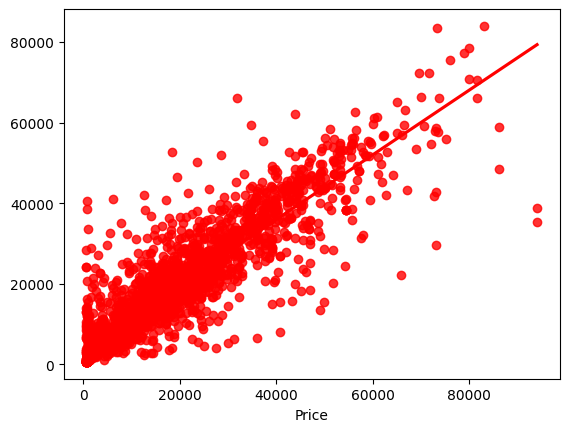

In [38]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the Grid Search model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
gs_preds = grid_search.predict(X_test)
r2 = r2_score(y_test, gs_preds)*100
print(f'R-squared: {r2}')

In [41]:
from sklearn.model_selection import cross_val_predict

# Initialize base models
model1 = RandomForestRegressor(random_state=42)
model2 = CatBoostRegressor(random_state=42, verbose=0)  # verbose=0 to turn off training output
model3 = XGBRegressor(random_state=42)

# Train base models and get cross-validated predictions
y_pred1 = cross_val_predict(model1, X_train, y_train, cv=5)
y_pred2 = cross_val_predict(model2, X_train, y_train, cv=5)
y_pred3 = cross_val_predict(model3, X_train, y_train, cv=5)

# Fit the models on the entire training set
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Combine the predictions from the base models
combined_preds = np.column_stack((y_pred1, y_pred2, y_pred3))

# Initialize and train the meta-learner
meta_model = KNeighborsRegressor()
meta_model.fit(combined_preds, y_train)

# Use the trained models to make predictions on the test set
y_pred_test1 = model1.predict(X_test)
y_pred_test2 = model2.predict(X_test)
y_pred_test3 = model3.predict(X_test)

# Combine the predictions from the base models
combined_test_preds = np.column_stack((y_pred_test1, y_pred_test2, y_pred_test3))

# Use the meta-learner to make the final prediction
final_pred = meta_model.predict(combined_test_preds)

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, final_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, final_pred)
r2 = r2_score(y_test, final_pred)*100

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

MSE: 47002721.79347981
RMSE: 6855.853104718611
MAE: 4183.092274982283
R-squared: 77.36855588216616
